In [23]:
# check if ngspice can be found from python
from ctypes.util import find_library
ngspice_lib_filename = find_library('libngspice')
print(ngspice_lib_filename) ## if the result is none, make sure that libngspice is installed

/usr/local/lib/libngspice.dylib


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.NgSpice.Shared import NgSpiceShared

In [26]:
ngspice = NgSpiceShared.new_instance()
print(ngspice.exec_command('version -f'))

******
** ngspice-32 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
**
** CIDER 1.b1 (CODECS simulator) included
** XSPICE extensions included
** Relevant compilation options (refer to user's manual):
** X11 interface not compiled into ngspice
**
******


In [27]:
def simulate(circuit):
    ngspice.load_circuit(circuit)
    print('Loaded circuit:')
    print(ngspice.listing())

    ngspice.run()
    print('Plots:', ngspice.plot_names)
    plot = ngspice.plot(simulation=None, plot_name=ngspice.last_plot)
    return plot

In [28]:
#simple neuron posted in the slack

In [29]:
mos_ckt = '''
* SPICE file
.include 180nm.lib
.option scale=1u


V1 Vdd 0 1.8
V6 Vtau 0 0.4

V2 Vthr 0 200m
V3 Vb1 0 1

C1 Vmem 0 100p
Rload out 0 100k

Iin Vdd Vmem PULSE(500n 0.1n 0 0 0 10u 20u)

M5 N001 N001 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
M6 N002 N001 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
M8 N001 Vmem N004 N004 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M9 N002 Vthr N004 N004 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M10 N004 Vb1 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2

Mreset Vmem out 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M7 N003 N002 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M18 out N003 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M19 N003 N002 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
M20 out N003 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
Mleak Vmem Vtau 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2

.tran 0.001u 500u UIC


.end
'''

In [30]:
plot = simulate(mos_ckt)

Loaded circuit:
* spice file
2 : .global gnd
5 : .model nmos nmos level=49 lint=4.e-08 tox=4.e-09 vth0=0.3999 rdsw=250 lmin=1.8e-7 lmax=1.8e-7 wmin=1.8e-7 wmax=1.0e-4 tref=27.0 version=3.1 xj=6.0000000e-08 nch=5.9500000e+17 lln=1.0000000 lwn=1.0000000 wln=0.00 wwn=0.00 ll=0.00 lw=0.00 lwl=0.00 wint=0.00 wl=0.00 ww=0.00 wwl=0.00 mobmod=1 binunit=2 xl=0 xw=0 binflag=0 dwg=0.00 dwb=0.00 k1=0.5613000 k2=1.0000000e-02 k3=0.00 dvt0=8.0000000 dvt1=0.7500000 dvt2=8.0000000e-03 dvt0w=0.00 dvt1w=0.00 dvt2w=0.00 nlx=1.6500000e-07 w0=0.00 k3b=0.00 ngate=5.0000000e+2
7 : .model pmos pmos level=49 lint=3.e-08 tox=4.2e-09 vth0=-0.42 rdsw=450 lmin=1.8e-7 lmax=1.8e-7 wmin=1.8e-7 wmax=1.0e-4 tref=27.0 version=3.1 xj=7.0000000e-08 nch=5.9200000e+17 lln=1.0000000 lwn=1.0000000 wln=0.00 wwn=0.00 ll=0.00 lw=0.00 lwl=0.00 wint=0.00 wl=0.00 ww=0.00 wwl=0.00 mobmod=1 binunit=2 xl=0.00 xw=0.00 binflag=0 dwg=0.00 dwb=0.00 acm=0 ldif=0.00 hdif=0.00 rsh=0 rd=0 rs=0 rsc=0 rdc=0 k1=0.5560000 k2=0.00 k3=0.00 dvt0=11.

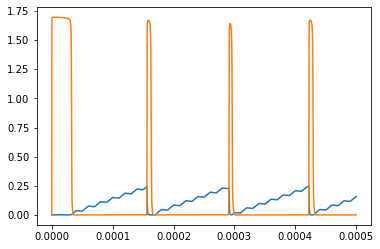

In [40]:
plt.plot(plot['time']._data,plot['vmem']._data)
plt.plot(plot['time']._data,plot['out']._data)

In [37]:
plot

{'v1#branch': variable: v1#branch current,
 'v6#branch': variable: v6#branch current,
 'v2#branch': variable: v2#branch current,
 'v3#branch': variable: v3#branch current,
 'n003': variable: n003 voltage,
 'n004': variable: n004 voltage,
 'n002': variable: n002 voltage,
 'n001': variable: n001 voltage,
 'out': variable: out voltage,
 'vmem': variable: vmem voltage,
 'vb1': variable: vb1 voltage,
 'vthr': variable: vthr voltage,
 'vtau': variable: vtau voltage,
 'vdd': variable: vdd voltage,
 'time': variable: time time}